In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data = pd.read_csv("adult.csv")
data.head(6)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


In [3]:
#### EDA 
data.shape

(32560, 15)

In [4]:
data.size

488400

In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

data.columns = col_names

data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
data.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
data.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
data.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

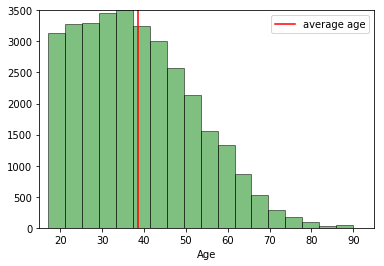

In [10]:
plt.hist(data.age, facecolor='green', alpha=0.5, bins=18, edgecolor='black')
plt.xlabel('Age')
plt.axvline(data.age.mean(), color='red', label='average age')
plt.axis([15, 95, 0, 3500])
plt.legend()
plt.show()

In [11]:
##### Feature Engineering
print('workclass',data.workclass.unique())
print('education',data.education.unique())
print('marital_status',data['marital_status'].unique())
print('occupation',data.occupation.unique())
print('relationship',data.relationship.unique())
print('race',data.race.unique())
print('Sex',data.sex.unique())
print('native_country',data['native_country'].unique())
print('income',data.income.unique())

workclass [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital_status [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
relationship [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
Sex [' Male' ' Female']
native_country [' United-States' ' Cuba' ' Jamaica' ' India' 

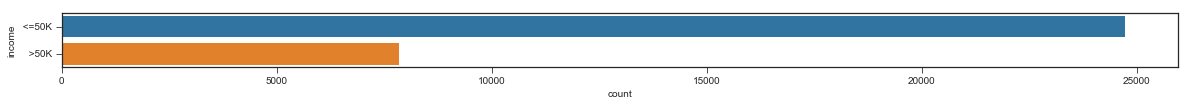

In [12]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="income", data=data)

In [13]:
data['education'].replace('10th', 'dropout',inplace=True)
data['education'].replace('11th', 'dropout',inplace=True)
data['education'].replace('12th', 'dropout',inplace=True)
data['education'].replace('1st-4th', 'dropout',inplace=True)
data['education'].replace('5th-6th', 'dropout',inplace=True)
data['education'].replace('7th-8th', 'dropout',inplace=True)
data['education'].replace('9th', 'dropout',inplace=True)
data['education'].replace('HS-Grad', 'HighGrad',inplace=True)
data['education'].replace('HS-grad', 'HighGrad',inplace=True)
data['education'].replace('Some-college', 'CommunityCollege',inplace=True)
data['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
data['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
data['education'].replace('Bachelors', 'Bachelors',inplace=True)
data['education'].replace('Masters', 'Masters',inplace=True)
data['education'].replace('Prof-school', 'Masters',inplace=True)
data['education'].replace('Doctorate', 'Doctorate',inplace=True)

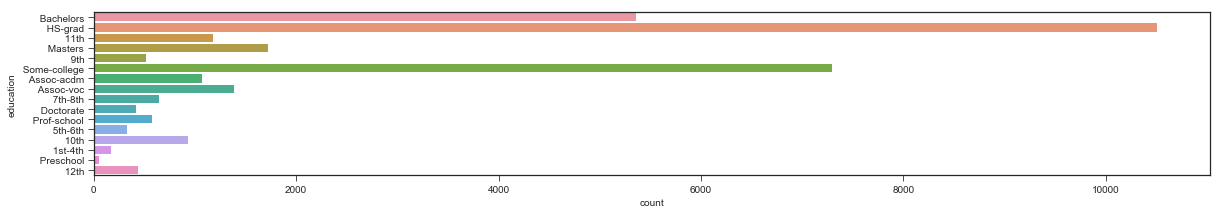

In [14]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=data)

In [15]:
data['marital_status'].replace('Never-married', 'NotMarried',inplace=True)
data['marital_status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
data['marital_status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
data['marital_status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
data['marital_status'].replace(['Separated'], 'Separated',inplace=True)
data['marital_status'].replace(['Divorced'], 'Separated',inplace=True)
data['marital_status'].replace(['Widowed'], 'Widowed',inplace=True)

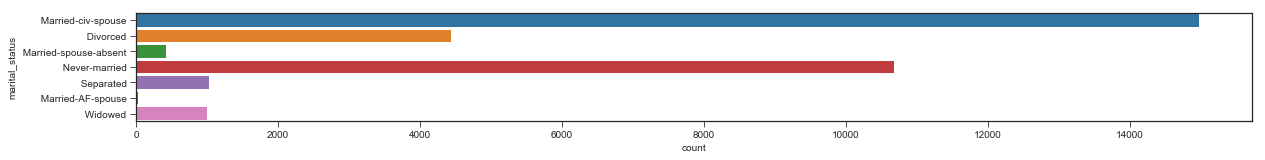

In [16]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital_status", data=data)

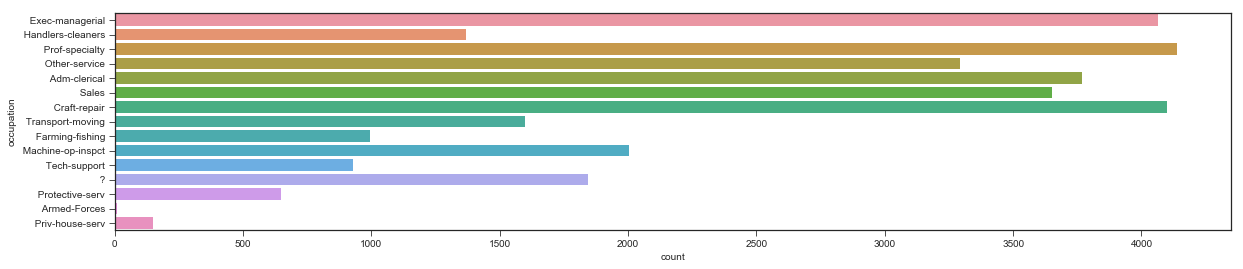

In [17]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=data)

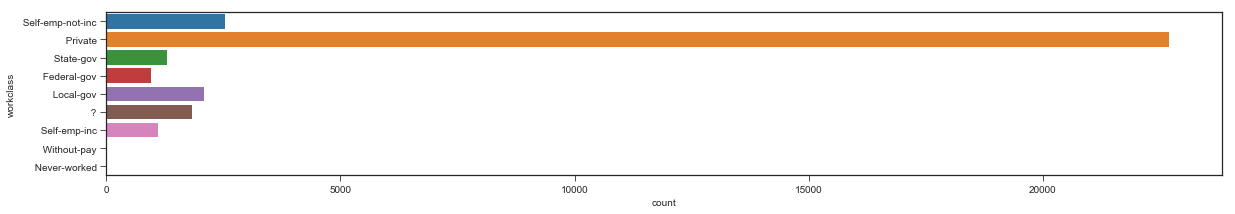

In [18]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=data)

In [19]:
data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,>50K,44.249841
0,<=50K,36.783648


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


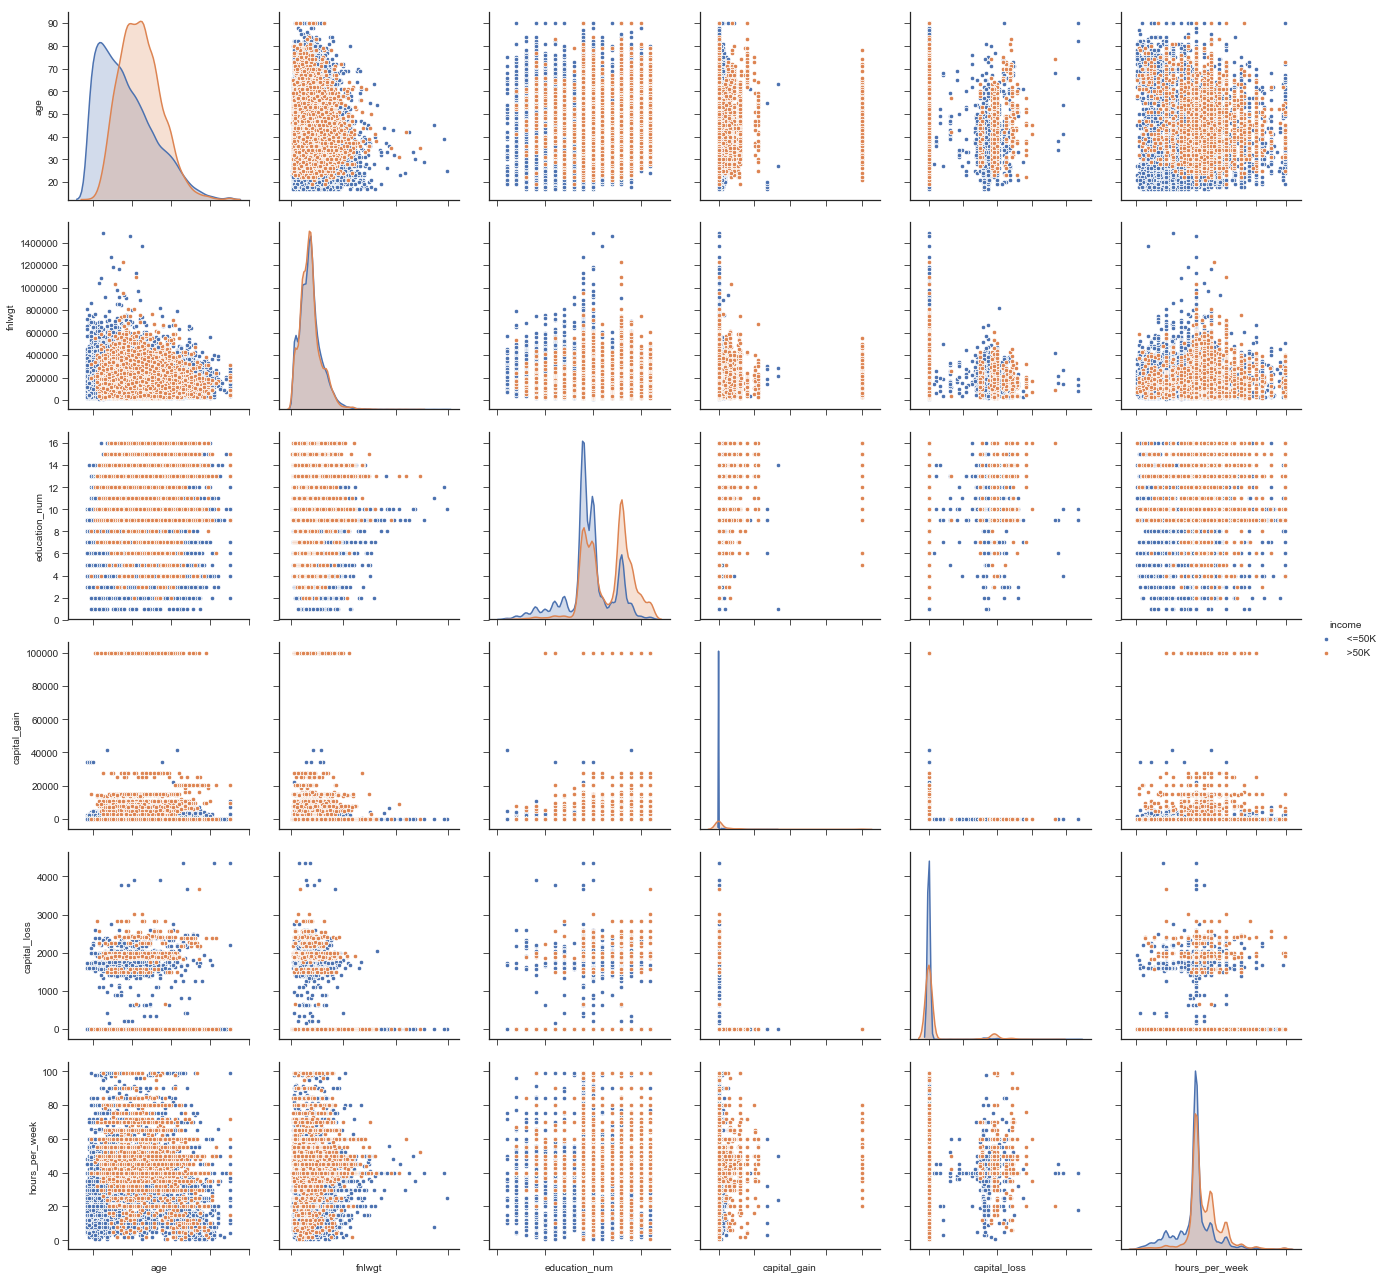

In [20]:
pp = sns.pairplot(data, hue = 'income', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
data = data.apply(LabelEncoder().fit_transform)
data.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0


In [23]:
drop_elements = ['education', 'native_country', 'income', 'age','hours_per_week']
y = data["income"]
X = data.drop(drop_elements, axis=1)
X.head(2)

,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss
0,6,2925,12,2,4,0,4,1,0,0
1,4,14085,8,0,6,1,4,1,0,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [25]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

In [26]:
y_pred = GNB.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8045


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4980
           1       0.67      0.34      0.45      1532

    accuracy                           0.80      6512
   macro avg       0.74      0.64      0.67      6512
weighted avg       0.79      0.80      0.78      6512

